In [3]:
#IMPORTING LIBRARIES REQUIRED FOR DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

#IMPORTING WARNINGS IGNORES ALL THE ERRORS
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [4]:
df=pd.read_csv("C:\\Users\\lahar\\OneDrive\\Documents\\ml\\IRIS.csv")

In [ ]:
#BASIC CHECKS

In [25]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.head(10)

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

EDA
DATA VISUALIZATION

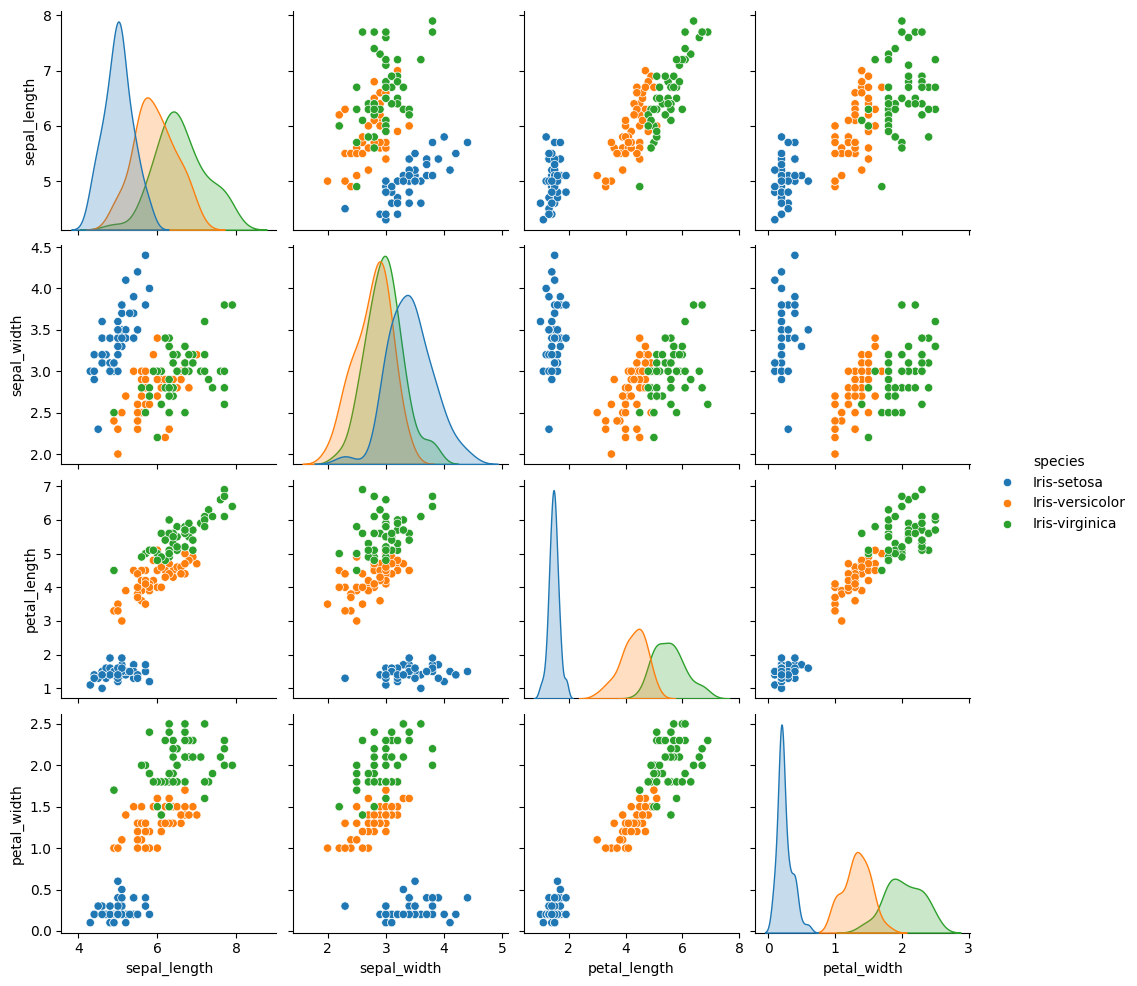

In [26]:
# Pairplot: Visualize relationships between features, colored by species
sns.pairplot(df, hue='species')
plt.show()

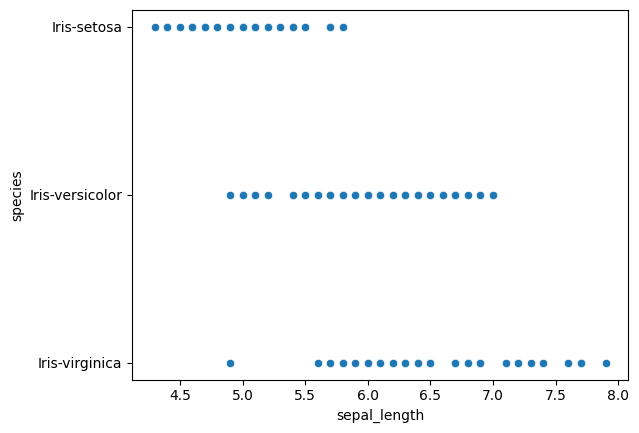

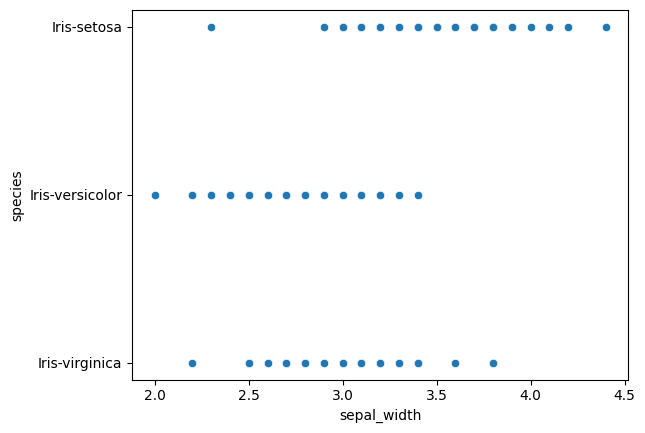

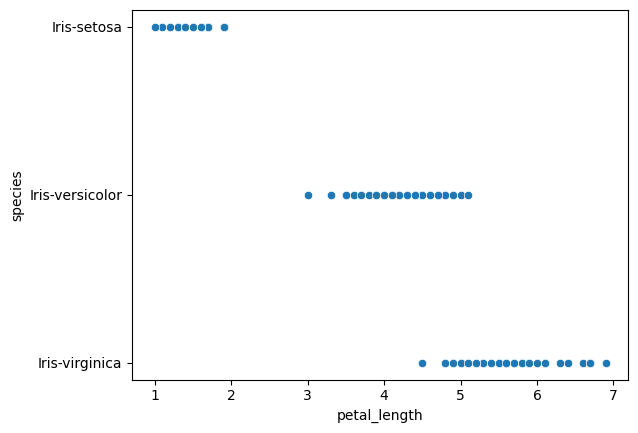

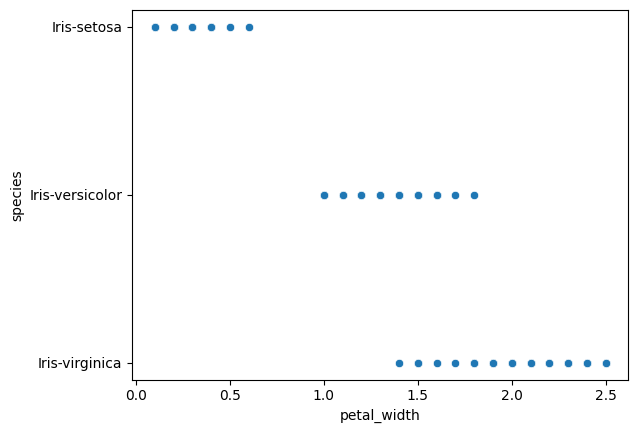

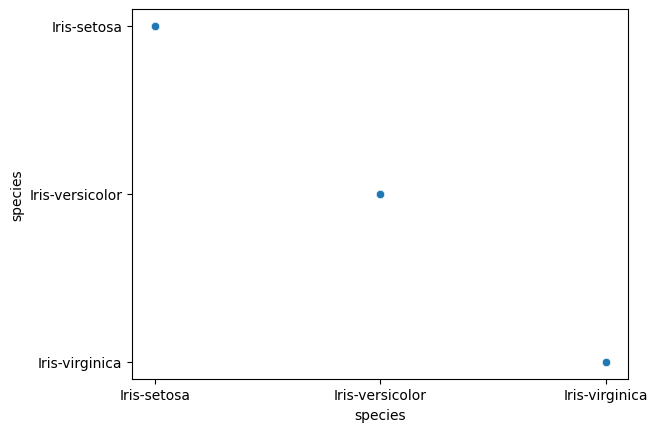

In [ ]:
for i in df.columns[:-1]:
    sns.scatterplot(data = df, x = i, y = 'species')
    plt.show()

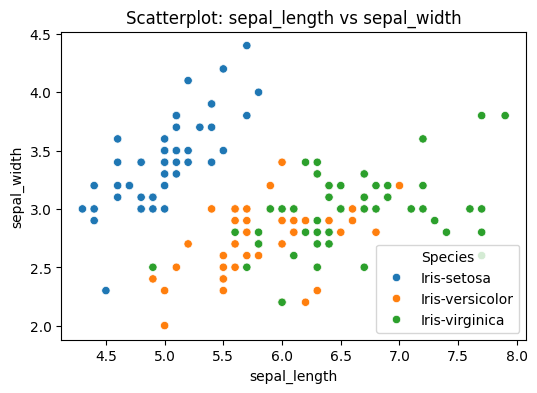

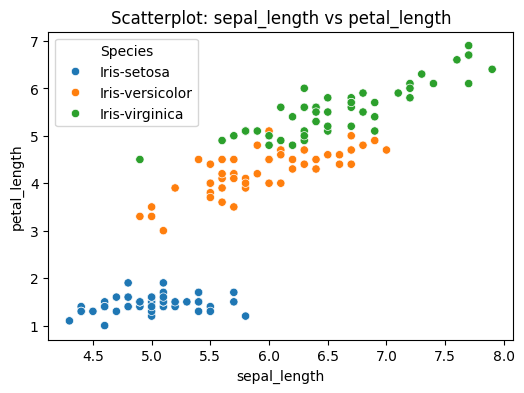

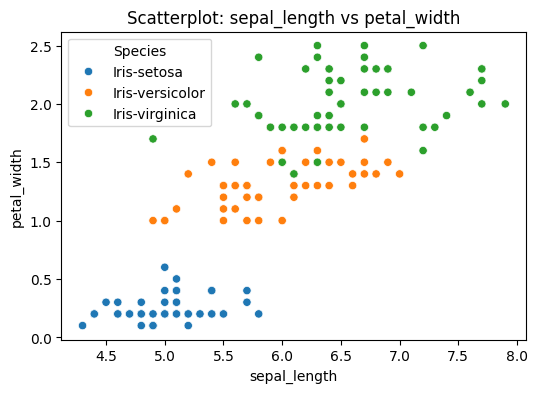

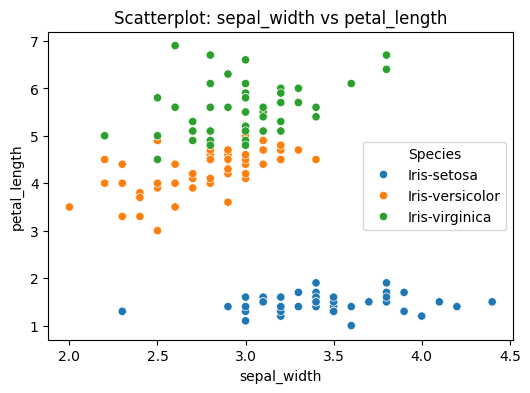

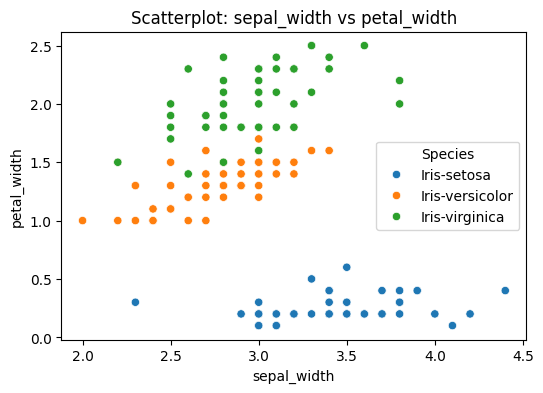

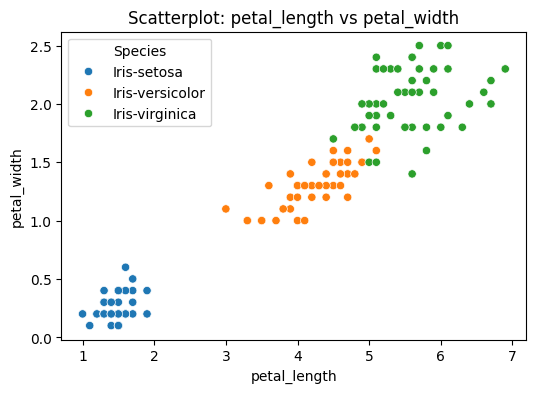

In [39]:
from itertools import combinations

features = df.columns[:-1]  # All numeric features
for x_feat, y_feat in combinations(features, 2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_feat, y=y_feat, hue='species')
    plt.title(f"Scatterplot: {x_feat} vs {y_feat}")
    plt.legend(title='Species')
    plt.show()

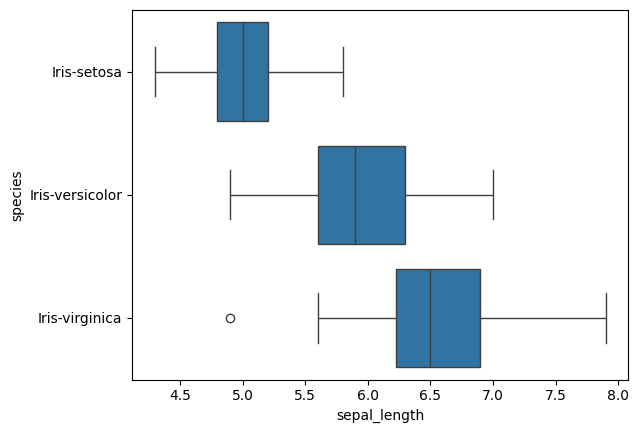

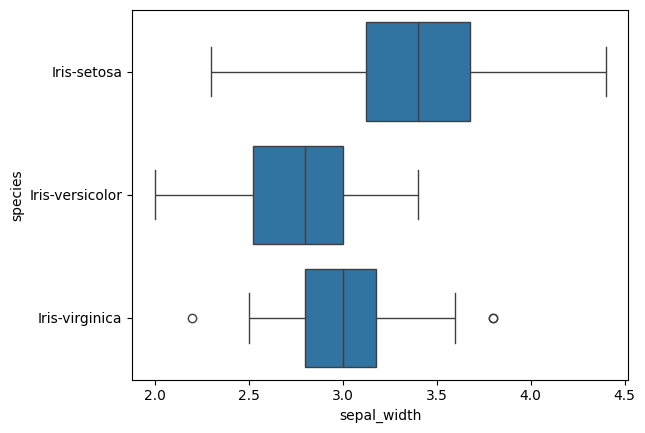

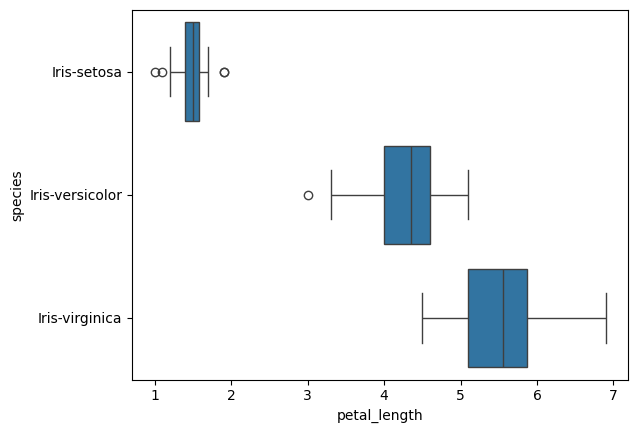

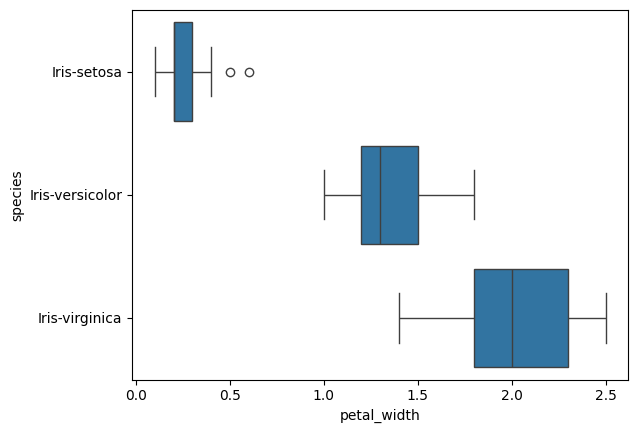

In [33]:
for i in df.columns[:-1]:
    sns.boxplot(data=df,x=i,y='species')
    plt.show()
    # Plot boxplots of all numerical features grouped by species


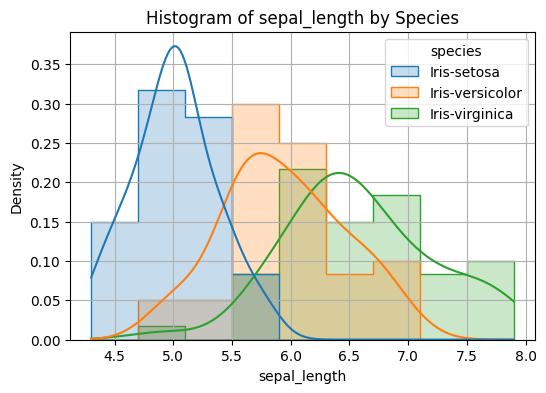

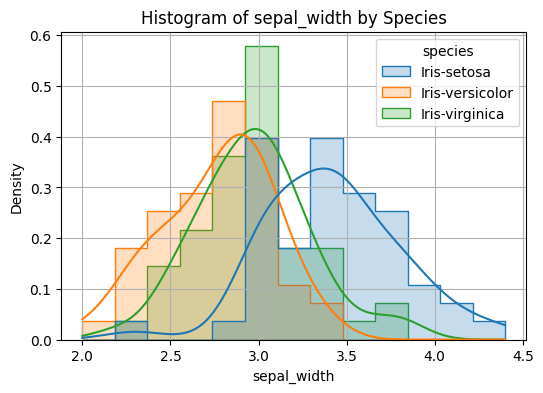

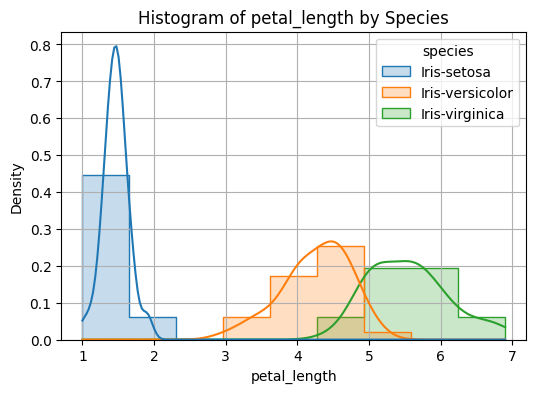

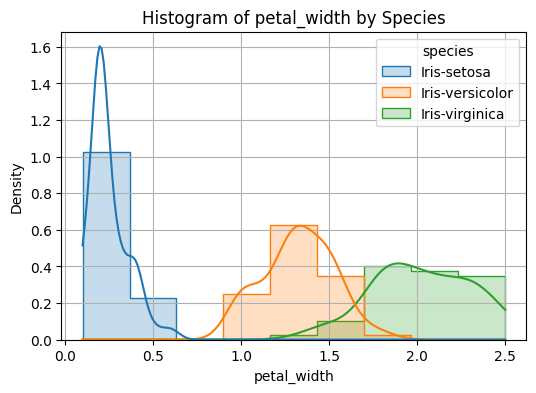

In [8]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='species', kde=True, element='step', stat='density')
    plt.title(f"Histogram of {col} by Species")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

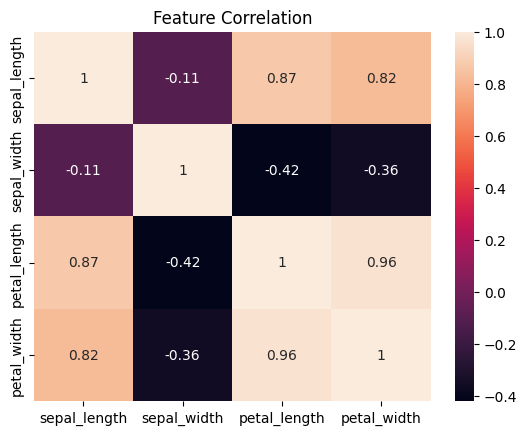

In [7]:
#Correlation heatmap (for numeric features only)
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, )
plt.title("Feature Correlation")
plt.show()

In [ ]:
x=df.drop(['species'],axis=1)
y=df['species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:

#As the target variable is categorial , it is converted to numerical uim=ng labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Fit only on y_train
y_train_encoded= le.fit_transform(y_train)

# Then transform y_test using the same encoder
y_test_encoded = le.transform(y_test)

MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.0)
classifier.fit(X_train, y_train_encoded)


LogisticRegression()

In [12]:
y_pred = classifier.predict(X_test)
calculation = pd.DataFrame(np.c_[y_test_encoded,y_pred], columns = ["Original","Predicted"])
calculation

,Original,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test_encoded,y_pred)
print("Accuracy score of testing data: " + str(accuracy_score))

Accuracy score of testing data: 1.0


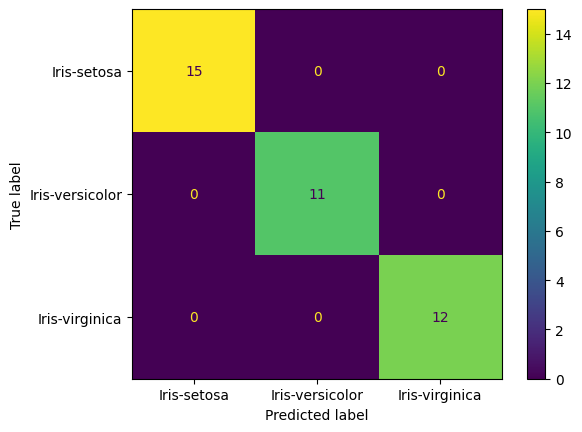

In [ ]:
#Determines the true +ve , true -ve,false +ve,false -ve,
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()

In [ ]:
#This checks how well your model performs across different splits of data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x, le.fit_transform(y), cv=5)
print("Cross-validation average accuracy:", scores.mean())

Cross-validation average accuracy: 0.9733333333333334


In [24]:
 #trying different classifiers to compare performance:
del accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_encoded,y_pred)
    print(f"{name}: Accuracy = {acc:.2f}")

Logistic Regression: Accuracy = 1.00
SVM: Accuracy = 1.00
KNN: Accuracy = 1.00
Random Forest: Accuracy = 1.00
